<a href="https://colab.research.google.com/github/jeevanshrestha/Machine-Learning/blob/main/MLR_Custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes

In [2]:
X,y = load_diabetes(return_X_y=True)


In [3]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [4]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

**Using Sklearn's Linear Regression**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [7]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [9]:
reg = LinearRegression()

In [10]:
reg.fit(X_train,y_train)


LinearRegression()

In [11]:
y_pred = reg.predict(X_test)


In [13]:
r2_score(y_test,y_pred)


0.4399338661568968

In [14]:
reg.coef_


array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [15]:
reg.intercept_


151.88331005254167

**Making our own Linear Regression Class**

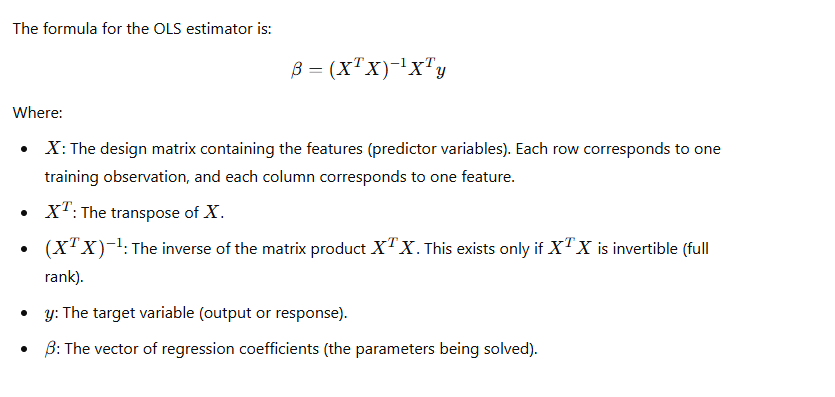

In [25]:
class CustomMLR:

  def __init__(self):
    self.coef_ = None
    self.intercept_ = None

  def fit(self, X_train, y_train):
    X_train = np.insert(X_train, 0 ,1, axis =1)

    #calcualte the coeffs
    betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

    self.intercept_ = betas[0]
    self.coef_ = betas[1:]

  def predict(self, X_test):
    y_pred = np.dot(X_test, self.coef_) + self.intercept_
    return y_pred

In [26]:
lr = CustomMLR()

In [27]:
lr.fit(X_train, y_train)

In [28]:
y_pred = lr.predict(X_test)

In [29]:
y_pred

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [30]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [31]:
lr.intercept_

151.88331005254165